In [2]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset import

In [1]:
!kaggle datasets download -d omkargurav/face-mask-dataset


  0%|          | 0.00/163M [00:00<?, ?B/s]
  1%|          | 1.00M/163M [00:00<01:04, 2.63MB/s]
  2%|▏         | 3.00M/163M [00:00<00:27, 6.18MB/s]
  6%|▌         | 9.00M/163M [00:00<00:08, 18.4MB/s]
  7%|▋         | 12.0M/163M [00:01<00:27, 5.72MB/s]
  9%|▊         | 14.0M/163M [00:02<00:26, 5.90MB/s]
 10%|▉         | 16.0M/163M [00:02<00:25, 6.09MB/s]
 11%|█         | 18.0M/163M [00:02<00:20, 7.32MB/s]
 12%|█▏        | 20.0M/163M [00:02<00:17, 8.42MB/s]
 13%|█▎        | 22.0M/163M [00:02<00:14, 9.89MB/s]
 15%|█▍        | 24.0M/163M [00:03<00:12, 11.4MB/s]
 16%|█▌        | 26.0M/163M [00:03<00:11, 13.1MB/s]
 17%|█▋        | 28.0M/163M [00:03<00:09, 14.6MB/s]
 19%|█▉        | 31.0M/163M [00:03<00:08, 16.8MB/s]
 20%|██        | 33.0M/163M [00:03<00:09, 14.5MB/s]
 21%|██▏       | 35.0M/163M [00:04<00:16, 8.34MB/s]
 23%|██▎       | 38.0M/163M [00:04<00:11, 11.1MB/s]
 25%|██▌       | 41.0M/163M [00:04<00:09, 14.0MB/s]
 26%|██▋       | 43.0M/163M [00:04<00:12, 9.92MB/s]
 28%|██▊       | 45.

In [41]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = r'C:\Users\ahmed\OneDrive\Desktop\Face Mask Detection\face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Dependancy Importing

In [44]:
import os
import numpy as np # to convert the image to numpy array
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg # these two molude for visualize images and do other procedures
import cv2 #for image  processing and other task including images
import matplotlib.pyplot as plt
from PIL import Image #for read image and do proceccing
from sklearn.model_selection import train_test_split #this function used to split the data into training data



Listing all items for with or without mask folder

In [45]:
with_mask_files = os.listdir(r'C:\Users\ahmed\OneDrive\Desktop\Face Mask Detection\data\with_mask')
print(with_mask_files[0:10])
print(with_mask_files[-10:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg', 'with_mask_1002.jpg', 'with_mask_1003.jpg', 'with_mask_1004.jpg', 'with_mask_1005.jpg', 'with_mask_1006.jpg']
['with_mask_990.jpg', 'with_mask_991.jpg', 'with_mask_992.jpg', 'with_mask_993.jpg', 'with_mask_994.jpg', 'with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [7]:
without_mask_files = os.listdir(r'C:\Users\ahmed\OneDrive\Desktop\Face Mask Detection\data\without_mask')
print(without_mask_files[0:10])
print(without_mask_files[-10:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg', 'without_mask_1002.jpg', 'without_mask_1003.jpg', 'without_mask_1004.jpg', 'without_mask_1005.jpg', 'without_mask_1006.jpg']
['without_mask_990.jpg', 'without_mask_991.jpg', 'without_mask_992.jpg', 'without_mask_993.jpg', 'without_mask_994.jpg', 'without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


Counting the number of elements in a particuler list

In [8]:
#to make sure the dataset is balanced
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating labels for the two class of images

In [9]:
#if with mask ---> 1
#if without mask ---> 0
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

Checking label

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying Images

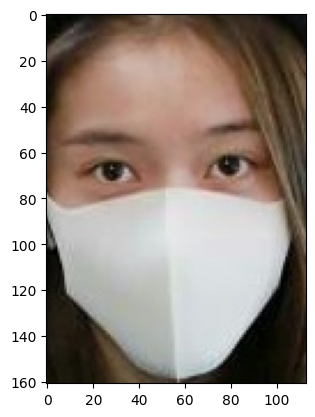

In [13]:
# displaying with mask image
img = mpimg.imread(r'C:\Users\ahmed\OneDrive\Desktop\Face Mask Detection\data\with_mask\with_mask_71.jpg')# this function read the image in form of numpy array
imgplot = plt.imshow(img)#displaying it in matplotlib
plt.show()

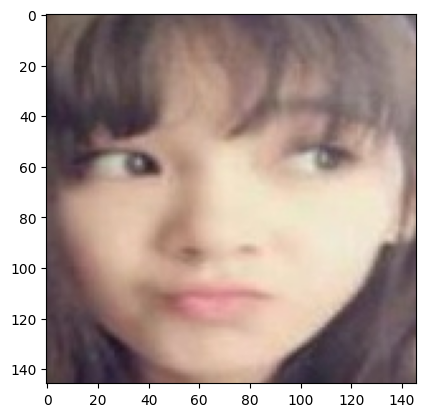

In [14]:
# displaying without mask image
img = mpimg.imread(r'C:\Users\ahmed\OneDrive\Desktop\Face Mask Detection\data\without_mask\without_mask_180.jpg')
imgplot = plt.imshow(img)
plt.show()

IMAGE PROCESSING

Resize the Images

Convert the images to numpy arrays

In [15]:
# convert images to numpy arrays+

with_mask_path = 'C:/Users/ahmed/OneDrive/Desktop/Face Mask Detection/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + '/' + img_file)#Reading all files with maks
  image = image.resize((128,128))#one shape or size for all images
  image = image.convert('RGB')#avoiding black and white color
  image = np.array(image)# converting into numpy arrays
  data.append(image)



without_mask_path = without_mask_path = 'C:/Users/ahmed/OneDrive/Desktop/Face Mask Detection/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + '/' + img_file)#Reading all files without maks
  image = image.resize((128,128))#one shape or size for all images
  image = image.convert('RGB')#avoiding black and white color
  image = np.array(image)# converting into numpy arrays
  data.append(image)
  #the error cause dealing with RGB but it will not affect

c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Lists that converted into numpy arrays

In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
# pixel values in three matrices red green and blue intensity values that generate rgb
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [19]:
type(data[0])#check the datatype is it a numpy array or not!

numpy.ndarray

In [20]:
data[0].shape#hight width and color channel

(128, 128, 3)

In [21]:
# again converting image data list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Spit

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
#training image will store in X_train and labels on Y_train
#test image will store in X_test and labels on Y_test

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Scaling the data

In [28]:
#we need to convert the pixel value size between 0 and 1

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [29]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

In [30]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

Convolutional Neural Network (CNN) Building

In [31]:
#widely used library in order to build neural network
import tensorflow as tf  #tensorflow build by google
from tensorflow import keras  #keras build by facebook
#keras need tensorflow in the back end

Developing Neural network

*Setting the architecture of the neural network*

In [32]:
num_of_classes = 2#with mask and without mask

'''The difference of ai neural network 
and convolutional neural networ is, 
ANN contain hidden layers where CNN contains 
convolutional layers and max polling layers'''

model = keras.Sequential() 
#adding convolutional layers on 2D to the neural network
#activation funcion relu
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
#adding max pooling layers
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# adding one more pair of convolutional layers and max pooling layers
#By changing the filter 32 to 64
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#passing the data image to out model
#will be passed as a single dimentional data
model.add(keras.layers.Flatten())

#adding dense layer so that all the neural network can connect with previous neural network
model.add(keras.layers.Dense(128, activation='relu'))
#to make sure there is no overfitting issues
model.add(keras.layers.Dropout(0.5))

#adding more dense layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

#adding our two classes to the neural network
#setting the atcivation fuction to sigmoid because of binary classification
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

*compiling the neural network*

In [33]:

# setting optimization algorithm adam optimiser and loss function matrix
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

*Training accuracy and validation acuracy*

In [34]:
# training the neural network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 200s 1s/step - loss: 0.5231 - acc: 0.7660 - val_loss: 0.3189 - val_acc: 0.8562
Epoch 2/5
170/170 [==============================] - 186s 1s/step - loss: 0.2947 - acc: 0.8838 - val_loss: 0.2287 - val_acc: 0.9140
Epoch 3/5
170/170 [==============================] - 184s 1s/step - loss: 0.2425 - acc: 0.9022 - val_loss: 0.2285 - val_acc: 0.9107
Epoch 4/5
170/170 [==============================] - 185s 1s/step - loss: 0.2204 - acc: 0.9119 - val_loss: 0.2628 - val_acc: 0.9107
Epoch 5/5
170/170 [==============================] - 184s 1s/step - loss: 0.1869 - acc: 0.9250 - val_loss: 0.2295 - val_acc: 0.9273


Model Evaluation

*Test accuracy*

In [46]:
'''only X_test_scaled  will be passed in the in the model 
and after the prediction is made it will compare with Y_testS'''
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 15s 311ms/step - loss: 0.2204 - acc: 0.9226
Test Accuracy = 0.9225678443908691


*Visualizing the loss and accuracy value*

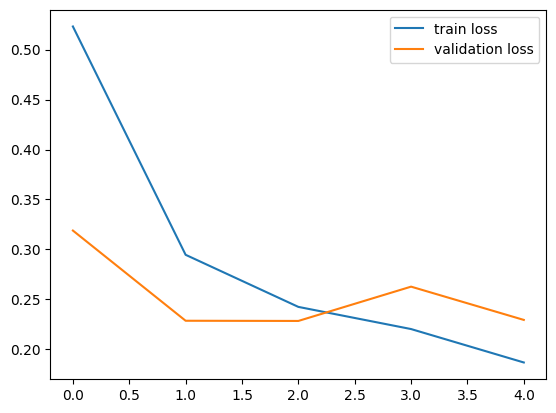

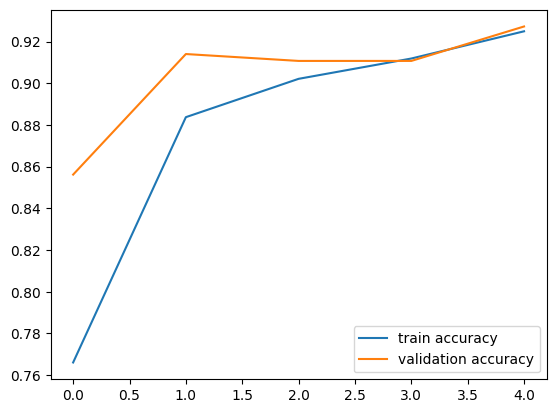

In [36]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

1/1 [==============================] - 0s 104ms/step
[[0.09377157 0.95479244]]
1
The person in the image is wearing a mask


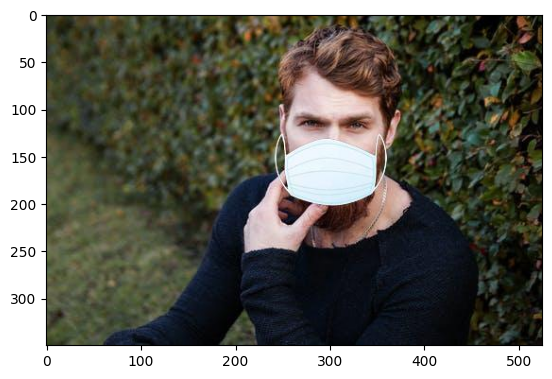

In [53]:
#setting the path as input
input_image_path = input('Path of the image to be predicted: ')

#reading the input image
input_image = cv2.imread(input_image_path)

# Convert to RGB format
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#showing the input image
plt.imshow(input_image)




#resizing the image with the shape that we trained our model
input_image_resized = cv2.resize(input_image, (128,128))

#Scaling the input image
input_image_scaled = input_image_resized/255

#Reshaping the input image
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

#Predicting the input image
#prdiction will give a probability value
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

#:)

1/1 [==============================] - 0s 33ms/step
[[0.7786171  0.35874534]]
0
The person in the image is not wearing a mask


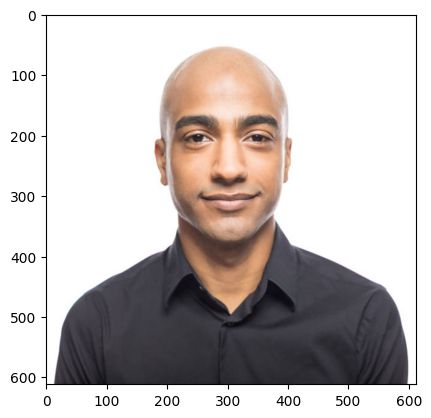

In [55]:
#setting the path as input
input_image_path = input('Path of the image to be predicted: ')

#reading the input image
input_image = cv2.imread(input_image_path)

# Convert to RGB format
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#showing the input image
plt.imshow(input_image)




#resizing the image with the shape that we trained our model
input_image_resized = cv2.resize(input_image, (128,128))

#Scaling the input image
input_image_scaled = input_image_resized/255

#Reshaping the input image
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

#Predicting the input image
#prdiction will give a probability value
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

#:)

1/1 [==============================] - 0s 30ms/step
[[0.98965013 0.09143226]]
0
The person in the image is not wearing a mask


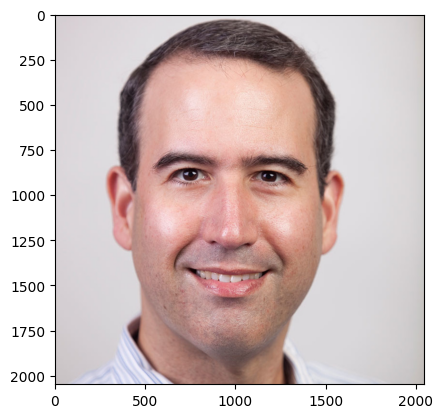

In [56]:
#setting the path as input
input_image_path = input('Path of the image to be predicted: ')

#reading the input image
input_image = cv2.imread(input_image_path)

# Convert to RGB format
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#showing the input image
plt.imshow(input_image)




#resizing the image with the shape that we trained our model
input_image_resized = cv2.resize(input_image, (128,128))

#Scaling the input image
input_image_scaled = input_image_resized/255

#Reshaping the input image
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

#Predicting the input image
#prdiction will give a probability value
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

#:)

1/1 [==============================] - 0s 29ms/step
[[0.41743204 0.6575772 ]]
1
The person in the image is wearing a mask


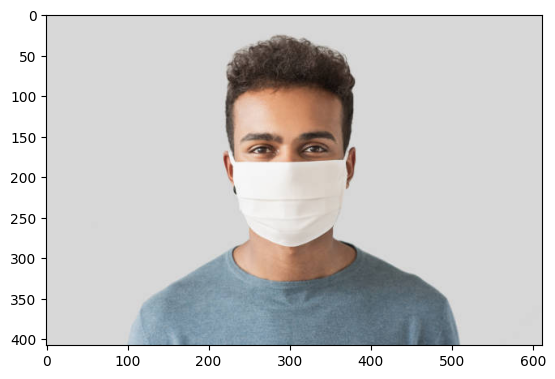

In [57]:
#setting the path as input
input_image_path = input('Path of the image to be predicted: ')

#reading the input image
input_image = cv2.imread(input_image_path)

# Convert to RGB format
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#showing the input image
plt.imshow(input_image)




#resizing the image with the shape that we trained our model
input_image_resized = cv2.resize(input_image, (128,128))

#Scaling the input image
input_image_scaled = input_image_resized/255

#Reshaping the input image
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

#Predicting the input image
#prdiction will give a probability value
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

#:)

1/1 [==============================] - 0s 29ms/step
[[0.7354439  0.38292566]]
0
The person in the image is not wearing a mask


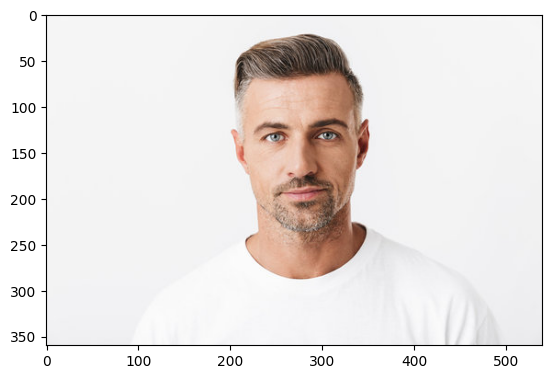

In [58]:
#setting the path as input
input_image_path = input('Path of the image to be predicted: ')

#reading the input image
input_image = cv2.imread(input_image_path)

# Convert to RGB format
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#showing the input image
plt.imshow(input_image)




#resizing the image with the shape that we trained our model
input_image_resized = cv2.resize(input_image, (128,128))

#Scaling the input image
input_image_scaled = input_image_resized/255

#Reshaping the input image
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

#Predicting the input image
#prdiction will give a probability value
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

#:)

1/1 [==============================] - 0s 28ms/step
[[0.5800145  0.52696997]]
0
The person in the image is not wearing a mask


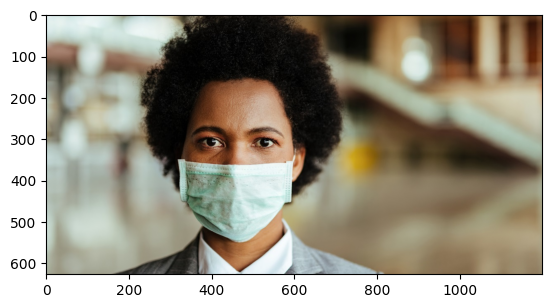

In [59]:
#setting the path as input
input_image_path = input('Path of the image to be predicted: ')

#reading the input image
input_image = cv2.imread(input_image_path)

# Convert to RGB format
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#showing the input image
plt.imshow(input_image)




#resizing the image with the shape that we trained our model
input_image_resized = cv2.resize(input_image, (128,128))

#Scaling the input image
input_image_scaled = input_image_resized/255

#Reshaping the input image
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

#Predicting the input image
#prdiction will give a probability value
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

#:)

1/1 [==============================] - 0s 29ms/step
[[0.6247046  0.43892765]]
0
The person in the image is not wearing a mask


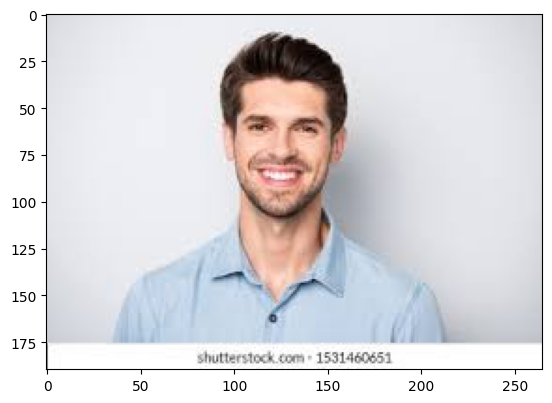

In [60]:
#setting the path as input
input_image_path = input('Path of the image to be predicted: ')

#reading the input image
input_image = cv2.imread(input_image_path)

# Convert to RGB format
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#showing the input image
plt.imshow(input_image)




#resizing the image with the shape that we trained our model
input_image_resized = cv2.resize(input_image, (128,128))

#Scaling the input image
input_image_scaled = input_image_resized/255

#Reshaping the input image
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

#Predicting the input image
#prdiction will give a probability value
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

#:)